# [Titanic Data Set](https://www.kaggle.com/c/titanic/data)

### Data Set Information:

El dataset del Titanic describe el estado de supervivencia de pasajeros en el barco Titanic. No contiene información de la tripulación, pero sí contiene edades reales y estimadas para casi el 80% de los pasajeros.

### Sources:
Hind, Philip. Encyclopedia Titanica. Online-only resource. Retrieved 01Feb2012 from
http://www.encyclopedia-titanica.org/

### Attribute Information:

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['figure.figsize'] = [15, 5]

In [14]:
# Getting the Data
raw_df = pd.read_csv("titanic-train.csv")
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
from data_processing import preprocess_titanic_data

df1 = preprocess_titanic_data(raw_df)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck
0,0,3,1,22,1,0,7.2500,8
1,1,1,0,38,1,0,71.2833,2
2,1,3,0,26,0,0,7.9250,8
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,8


# Entrenando los modelos

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

X = df1.drop("Survived", axis=1)
y = df1["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_dict = {}

clf_list = [
    LogisticRegression(solver='liblinear'),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    LinearSVC(),
    XGBClassifier(),
]

for clf in clf_list:
    
    clf_name = clf.__class__.__name__
    print(clf_name)
    
    fitted_clf = clf.fit(X_train, y_train)
    y_pred = fitted_clf.predict(X_test)
    clf_dict[clf_name] = fitted_clf

    print(f'  accuracy: {accuracy_score(y_test, y_pred):.2f}%')

LogisticRegression
  accuracy: 0.79%
GaussianNB
  accuracy: 0.78%
DecisionTreeClassifier
  accuracy: 0.76%
RandomForestClassifier
  accuracy: 0.79%
LinearSVC
  accuracy: 0.83%
XGBClassifier
  accuracy: 0.82%


/home/alicia/workspace/ml_bias/venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Permutation importance

In [29]:
from IPython.display import display
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

feature_names=X.columns.tolist()

for clf_name, clf in clf_dict.items():
    print(clf_name)
    display(show_weights(PermutationImportance(clf).fit(X_test, y_test), feature_names=feature_names))

LogisticRegression


Weight,Feature
0.2547 ± 0.0577,Sex
0.0235 ± 0.0286,Age
0.0089 ± 0.0114,Deck
0.0078 ± 0.0167,SibSp
0.0056 ± 0.0158,Pclass
0.0022 ± 0.0055,Parch
-0.0045 ± 0.0109,Fare


GaussianNB


Weight,Feature
0.1911 ± 0.0531,Sex
0.0335 ± 0.0234,Deck
0.0257 ± 0.0270,Fare
0.0190 ± 0.0167,SibSp
0.0034 ± 0.0055,Parch
0.0022 ± 0.0152,Pclass
-0.0056 ± 0.0122,Age


DecisionTreeClassifier


Weight,Feature
0.1587 ± 0.0598,Sex
0.0961 ± 0.0342,Pclass
0.0894 ± 0.0659,Deck
0.0369 ± 0.0439,Age
0.0168 ± 0.0291,Fare
0.0145 ± 0.0195,SibSp
-0.0022 ± 0.0114,Parch


RandomForestClassifier


Weight,Feature
0.1765 ± 0.0089,Sex
0.0268 ± 0.0228,Deck
0.0223 ± 0.0255,Fare
0.0168 ± 0.0387,Age
0.0134 ± 0.0114,Pclass
0.0112 ± 0.0187,SibSp
-0.0089 ± 0.0134,Parch


LinearSVC


Weight,Feature
0.1832 ± 0.0614,Sex
0.0872 ± 0.0343,Age
0.0358 ± 0.0378,Fare
0.0302 ± 0.0152,Pclass
0.0145 ± 0.0134,Parch
0.0134 ± 0.0152,Deck
0.0089 ± 0.0089,SibSp


XGBClassifier


Weight,Feature
0.1788 ± 0.0255,Sex
0.0961 ± 0.0460,Pclass
0.0503 ± 0.0447,Age
0.0112 ± 0.0158,SibSp
0.0089 ± 0.0114,Fare
0.0045 ± 0.0109,Parch
0.0022 ± 0.0134,Deck


# Partial Dependence Plots

## sklearn.inspection

Available features: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck']
LogisticRegression
GaussianNB
DecisionTreeClassifier
RandomForestClassifier


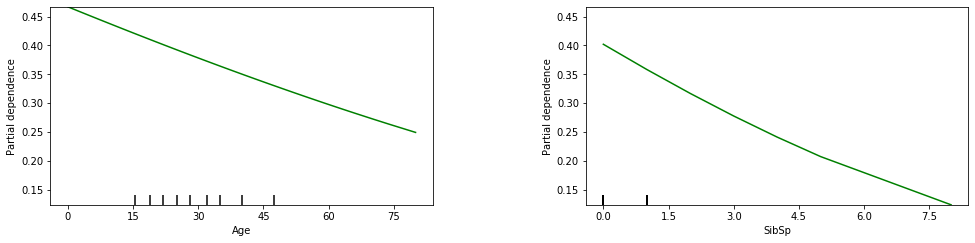

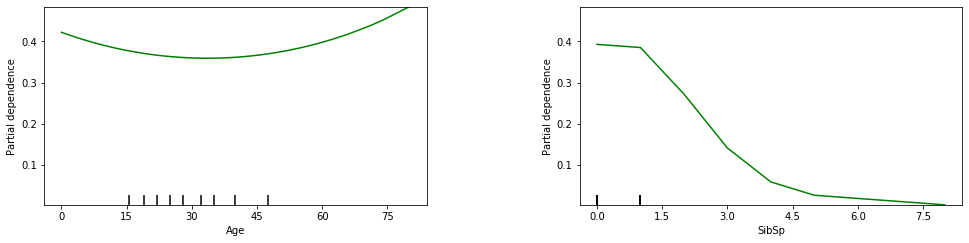

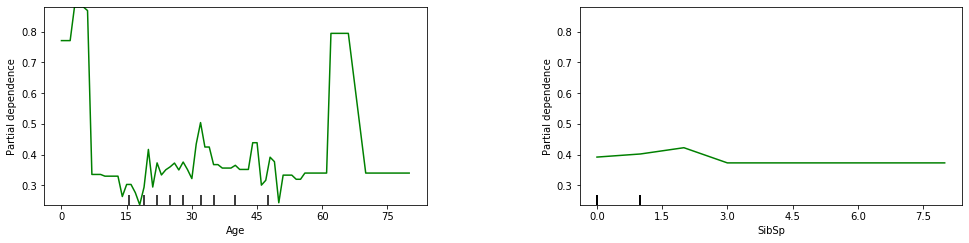

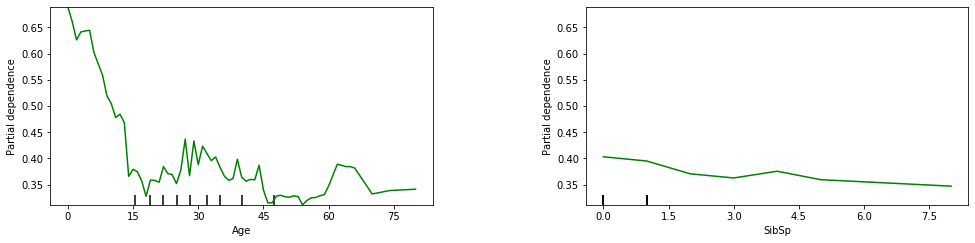

In [53]:
from sklearn.inspection import plot_partial_dependence

print(f'Available features: {df1.columns.to_list()}')

for clf_name, clf in clf_dict.items():
    if clf_name not in ['LinearSVC', 'XGBClassifier']:
        print(clf_name)
        plot_partial_dependence(
            clf, 
            X=X,  # raw predictors data
            features=[2,3],  # column numbers of plots we want to show
            feature_names=feature_names,   # labels on graphs
            n_cols=3,
            grid_resolution=100,
        ) 

## pdpbox.info_plots

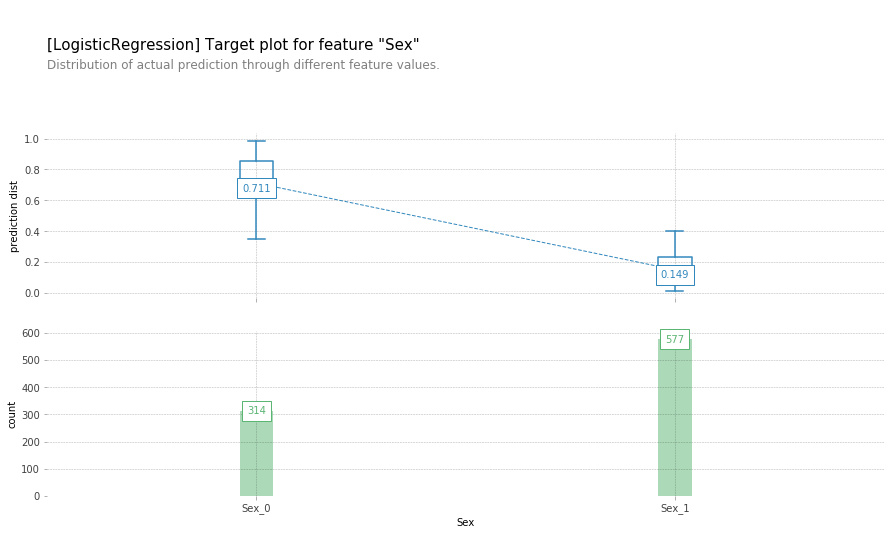

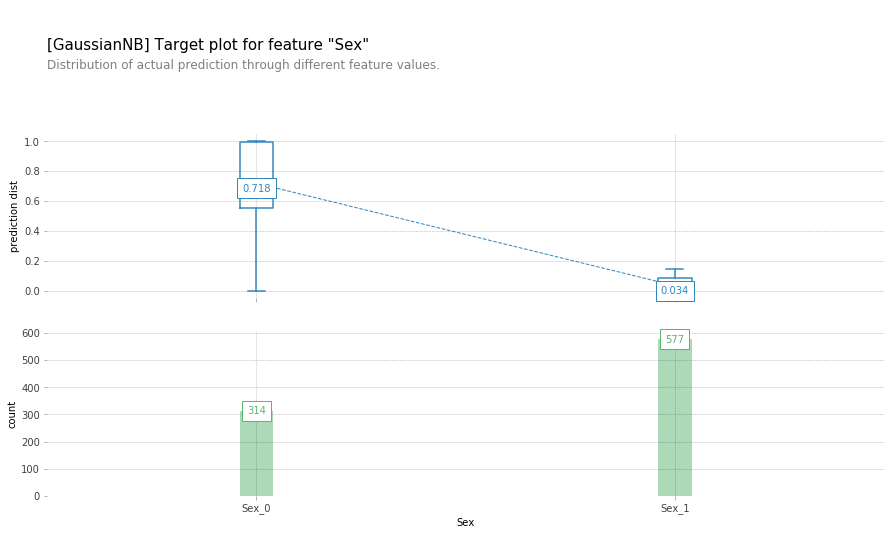

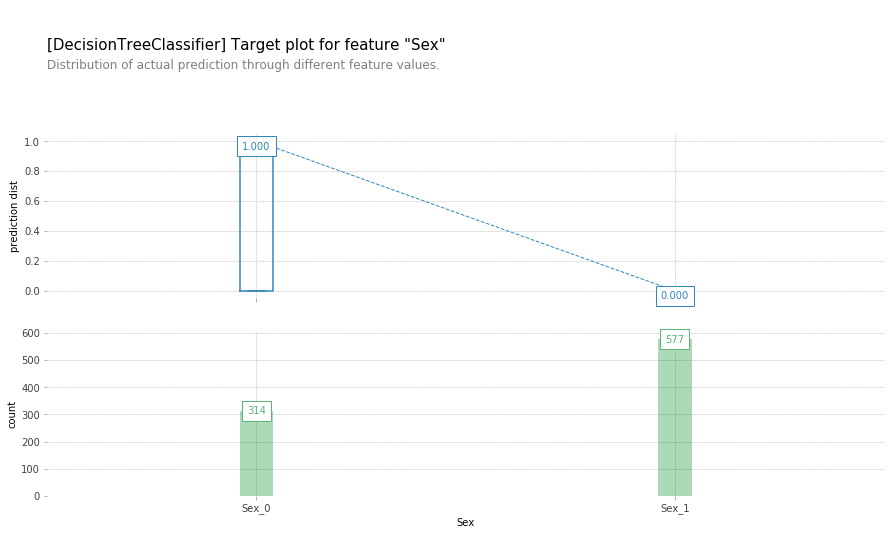

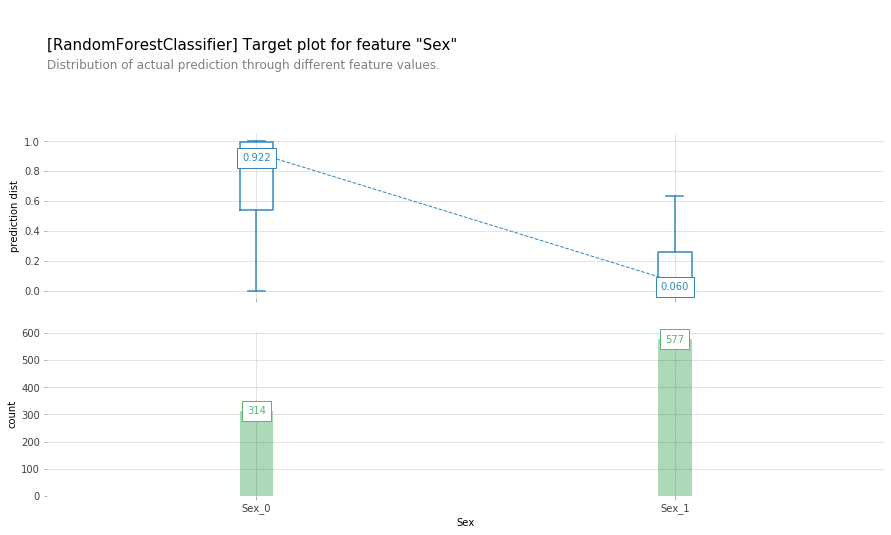

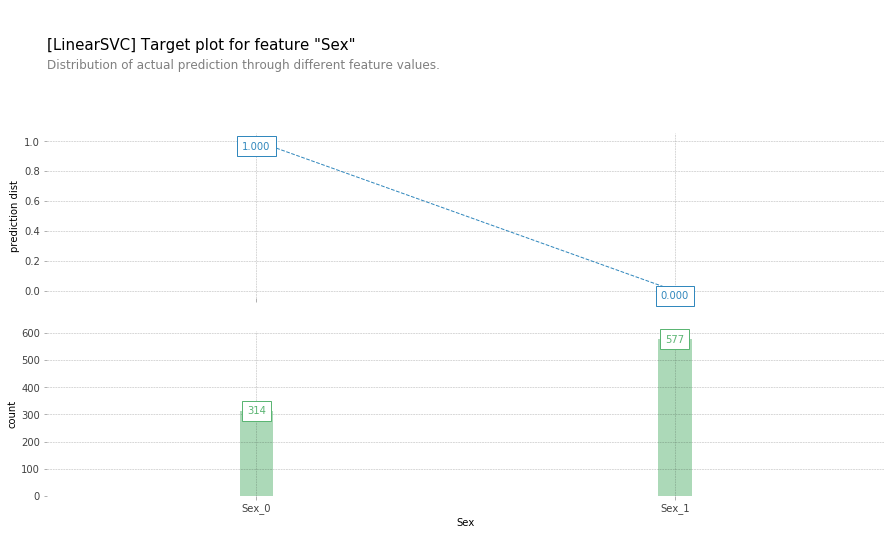

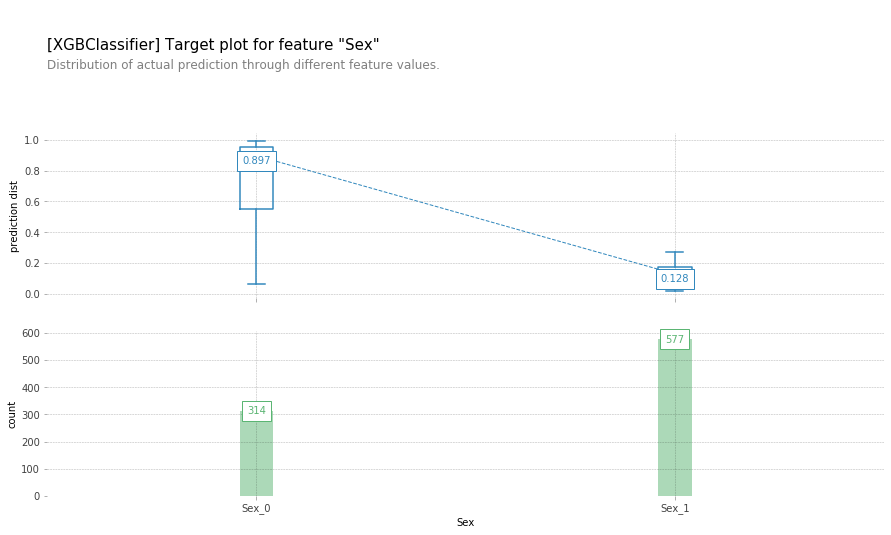

In [58]:
feature_name = 'Sex'
for clf_name, clf in clf_dict.items():
    fig, axes, summary_df = info_plots.actual_plot(
        model=clf, 
        X=X,
        feature=feature_name, 
        feature_name=feature_name,
        plot_params={'title': f'[{clf_name}] Target plot for feature "{feature_name}"'},
        predict_kwds={}
    ) 